In [7]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder

data = pd.read_csv("Life Expectancy Data.csv")

data.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In [9]:
data.isna().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64

In [15]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
import pandas as pd

numerical_columns = data.select_dtypes(include=['number']).columns
imputer = IterativeImputer()
data_imputed = data.copy() 
data_imputed[numerical_columns] = imputer.fit_transform(data[numerical_columns])

print(data_imputed.isna().sum())

Country                            0
Year                               0
Status                             0
Life expectancy                    0
Adult Mortality                    0
infant deaths                      0
Alcohol                            0
percentage expenditure             0
Hepatitis B                        0
Measles                            0
 BMI                               0
under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
 HIV/AIDS                          0
GDP                                0
Population                         0
 thinness  1-19 years              0
 thinness 5-9 years                0
Income composition of resources    0
Schooling                          0
dtype: int64


In [18]:
data.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

Mean Absolute Error (MAE): 1.4157999828722574
Mean Squared Error (MSE): 5.793382112431648
R-squared (R2): 0.933427661416378

Feature Importance:
                            Feature  Importance
14                         HIV/AIDS    0.599805
19  Income composition of resources    0.221707
3                   Adult Mortality    0.110156
18               thinness 5-9 years    0.010626
20                        Schooling    0.008566
10               under-five deaths     0.007552
12                Total expenditure    0.006479
1                              Year    0.004642
5                           Alcohol    0.004557
8                          Measles     0.003612
16                       Population    0.003419
17             thinness  1-19 years    0.003415
9                              BMI     0.003025
0                           Country    0.002588
15                              GDP    0.002214
11                            Polio    0.001897
13                      Diphtheria     

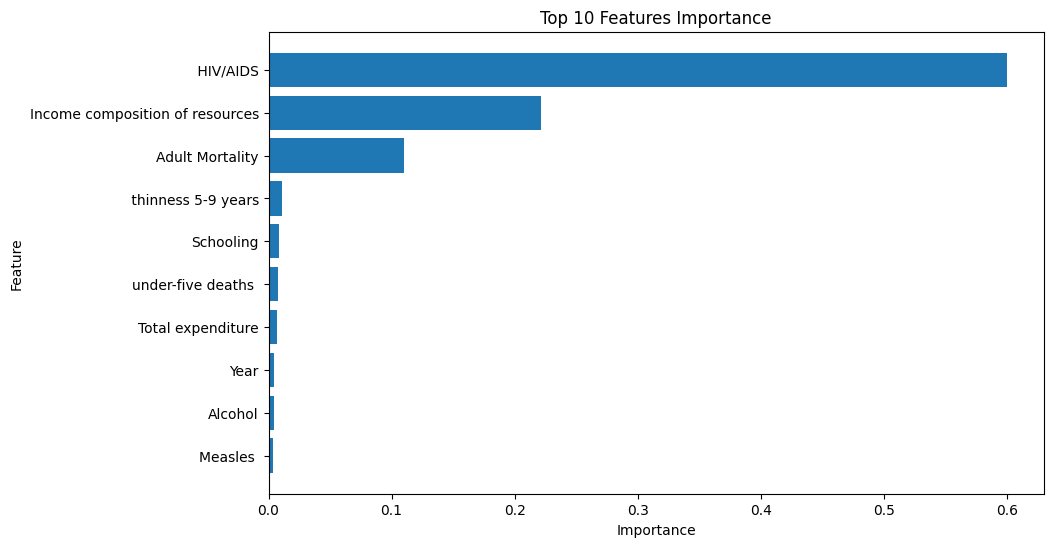

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

# Daten laden
data = pd.read_csv("Life Expectancy Data.csv")

# Numerische Spalten imputieren
numerical_columns = data.select_dtypes(include=['number']).columns
imputer = IterativeImputer()
data_imputed = data.copy() 
data_imputed[numerical_columns] = imputer.fit_transform(data[numerical_columns])

# Feature- und Zielvariablen definieren
X = data_imputed.drop(['Life expectancy '], axis=1)  # Korrigiere hier die Spaltenbezeichnung
y = data_imputed['Life expectancy ']  # Korrigiere hier die Spaltenbezeichnung

# Kategorische Variablen kodieren
label_encoder = LabelEncoder()
for column in X.select_dtypes(include=['object']).columns:
    X[column] = label_encoder.fit_transform(X[column])

# Trainings- und Testdaten aufteilen
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entscheidungsbaum-Regressor erstellen und trainieren
model = DecisionTreeRegressor(random_state=42)
model.fit(X_train, y_train)

# Vorhersagen für Testdaten machen
y_pred = model.predict(X_test)

# Leistungsmaße berechnen
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Ergebnisse ausgeben
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("R-squared (R2):", r2)

# Feature Wichtigkeiten anzeigen
feature_importance = model.feature_importances_
feature_names = X.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
print("\nFeature Importance:")
print(feature_importance_df)

# Beispielplot der ersten 10 wichtigsten Merkmale
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'][:10], feature_importance_df['Importance'][:10])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Top 10 Features Importance')
plt.gca().invert_yaxis()
plt.show()

In [21]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Daten laden
data = pd.read_csv("Life Expectancy Data.csv")

# Numerische Spalten imputieren
numerical_columns = data.select_dtypes(include=['number']).columns
imputer = IterativeImputer()
data_imputed = data.copy() 
data_imputed[numerical_columns] = imputer.fit_transform(data[numerical_columns])

# Feature- und Zielvariablen definieren
X = data_imputed.drop(['Life expectancy '], axis=1)
y = data_imputed['Life expectancy ']

# Kategorische Variablen kodieren
label_encoder = LabelEncoder()
for column in X.select_dtypes(include=['object']).columns:
    X[column] = label_encoder.fit_transform(X[column])

# Trainings- und Testdaten aufteilen
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modelle definieren
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42),
    'Support Vector Regression': SVR(),
    'K-Nearest Neighbors': KNeighborsRegressor(),
    'Decision Tree': DecisionTreeRegressor(random_state=42)
}

# Pipeline für Vorverarbeitung und Modellierung erstellen
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('regressor', None)
])

# Modelle trainieren und evaluieren
best_model = None
best_score = -1

for name, model in models.items():
    pipeline.set_params(regressor=model)
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    print(f"\n{name}:")
    print("Mean Absolute Error (MAE):", mae)
    print("Mean Squared Error (MSE):", mse)
    print("R-squared (R2):", r2)
    
    if r2 > best_score:
        best_score = r2
        best_model = model

print("\nBestes Modell:", best_model)
print("Bestes R-squared (R2):", best_score)


Linear Regression:
Mean Absolute Error (MAE): 2.6809671281149967
Mean Squared Error (MSE): 13.189205193729586
R-squared (R2): 0.8484415119241471

Random Forest:
Mean Absolute Error (MAE): 1.0662508261103951
Mean Squared Error (MSE): 2.722091043241632
R-squared (R2): 0.9687201770797637

Gradient Boosting:
Mean Absolute Error (MAE): 1.4767752508119667
Mean Squared Error (MSE): 4.05313014706542
R-squared (R2): 0.9534250723951176

Support Vector Regression:
Mean Absolute Error (MAE): 2.1444463837454313
Mean Squared Error (MSE): 9.69055872783806
R-squared (R2): 0.8886448115842764

K-Nearest Neighbors:
Mean Absolute Error (MAE): 1.7595464583978753
Mean Squared Error (MSE): 6.157835643632544
R-squared (R2): 0.9292396891048262

Decision Tree:
Mean Absolute Error (MAE): 1.4186911393348423
Mean Squared Error (MSE): 5.845031772295594
R-squared (R2): 0.932834149961849

Bestes Modell: RandomForestRegressor(random_state=42)
Bestes R-squared (R2): 0.9687201770797637


In [24]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Daten laden
data = pd.read_csv("Life Expectancy Data.csv")

# Numerische Spalten imputieren
numerical_columns = data.select_dtypes(include=['number']).columns
imputer = IterativeImputer()
data_imputed = data.copy() 
data_imputed[numerical_columns] = imputer.fit_transform(data[numerical_columns])

# Feature- und Zielvariablen definieren
X = data_imputed.drop(['Life expectancy '], axis=1)
y = data_imputed['Life expectancy ']

# Kategorische Variablen kodieren
X = pd.get_dummies(X, drop_first=True)

# Trainings- und Testdaten aufteilen
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Random Forest Regressor erstellen und trainieren
rf_regressor = RandomForestRegressor(random_state=42)
rf_regressor.fit(X_train, y_train)

# Vorhersagen für Testdaten machen
y_pred = rf_regressor.predict(X_test)

# Leistungsmaße berechnen
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Ergebnisse ausgeben
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("R-squared (R2):", r2)


Mean Absolute Error (MAE): 1.0443293657836155
Mean Squared Error (MSE): 2.671546377651925
R-squared (R2): 0.9693009909335596


Mean Absolute Error (MAE): 1.0443293657836155
Mean Squared Error (MSE): 2.671546377651925
R-squared (R2): 0.9693009909335596


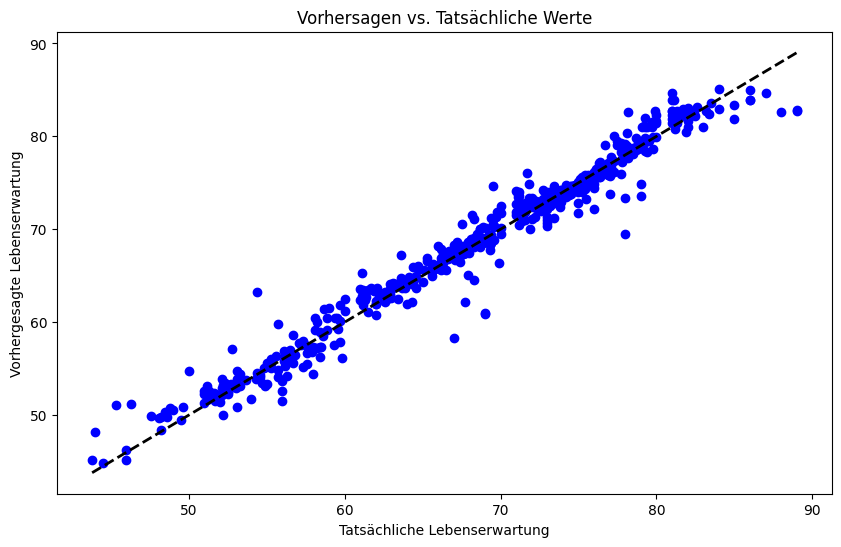

In [32]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def regression_report(model, X_test, y_test, y_pred):
    # Berechne Metriken
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    # Ausgabe der Metriken
    print("Mean Absolute Error (MAE):", mae)
    print("Mean Squared Error (MSE):", mse)
    print("R-squared (R2):", r2)
    
    # Visualisierung der Vorhersagen
    plt.figure(figsize=(10, 6))
    plt.scatter(y_test, y_pred, color='blue')
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
    plt.xlabel('Tatsächliche Lebenserwartung')
    plt.ylabel('Vorhergesagte Lebenserwartung')
    plt.title('Vorhersagen vs. Tatsächliche Werte')
    plt.show()

# Anwendung der Funktion
regression_report(rf_regressor, X_test, y_test, y_pred)

## Zusammenfassung: Random Forest Regressor

Der Random Forest Regressor ist ein leistungsfähiges Modell für die Vorhersage von kontinuierlichen Werten. Es handelt sich um eine Ensemble-Technik, die auf dem Konzept von Entscheidungsbäumen basiert.

### Funktionsweise:

1. **Ensemble von Entscheidungsbäumen**: Der Random Forest Regressor besteht aus einer Vielzahl von Entscheidungsbäumen, die unabhängig voneinander trainiert werden.

2. **Zufällige Unterstichproben**: Für jeden Baum im Ensemble wird eine zufällige Unterstichprobe der Trainingsdaten verwendet, um die Diversität der Bäume sicherzustellen.

3. **Bootstrap-Aggregierung (Bagging)**: Jeder Baum wird auf einer zufälligen Teilstichprobe der Trainingsdaten trainiert und die Vorhersagen aller Bäume werden dann gemittelt, um das Endergebnis zu erhalten.

### Vorteile:

- **Robustheit**: Random Forest ist robust gegenüber Überanpassung (Overfitting) und Rauschen in den Daten.
- **Hohe Genauigkeit**: Durch die Kombination vieler Entscheidungsbäume kann der Random Forest komplexe Beziehungen in den Daten modellieren.
- **Out-of-Bag-Evaluation**: Die Out-of-Bag-Evaluation ermöglicht eine Schätzung der Leistung des Modells ohne Verwendung eines separaten Validierungssatzes.

### Schritte zur Verwendung:

1. **Daten vorbereiten**: Die Daten müssen vor der Verwendung im Modell vorverarbeitet werden, einschließlich der Behandlung von fehlenden Werten und der Kodierung von kategorialen Variablen.

2. **Modell trainieren**: Der Random Forest Regressor wird mit den Trainingsdaten trainiert, um die Beziehung zwischen den Features und der Zielvariablen zu lernen.

3. **Modell evaluieren**: Das trainierte Modell wird auf Testdaten getestet, um die Leistung zu bewerten. Typische Metriken sind Mean Absolute Error (MAE), Mean Squared Error (MSE) und R-squared (R2).

4. **Vorhersagen machen**: Das trainierte Modell kann verwendet werden, um Vorhersagen für neue Daten zu machen.

### Einschränkungen:

- **Rechenintensiv**: Der Random Forest Regressor kann rechenintensiv sein, insbesondere wenn viele Bäume verwendet werden.
- **Schwierig zu interpretieren**: Aufgrund der Komplexität des Modells können die Vorhersagen schwer zu interpretieren sein.

### Anwendungen:

- Finanzprognosen
- Medizinische Diagnosen
- Kundenverhalten in der Wirtschaft
- Umweltmodellierung

Der Random Forest Regressor ist eine leistungsstarke und vielseitige Methode für die Regression, die in vielen Bereichen der Wissenschaft und Industrie erfolgreich eingesetzt wird.
